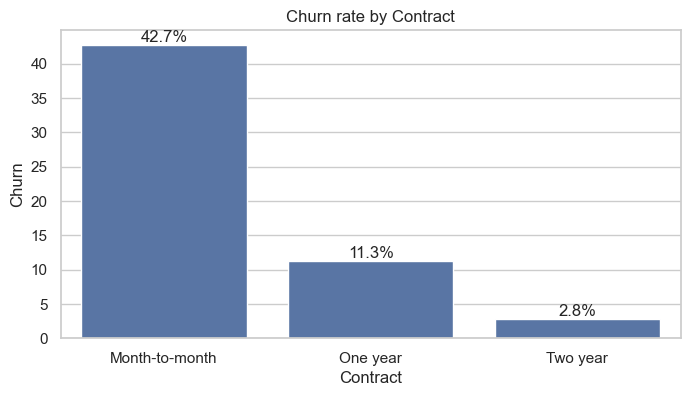

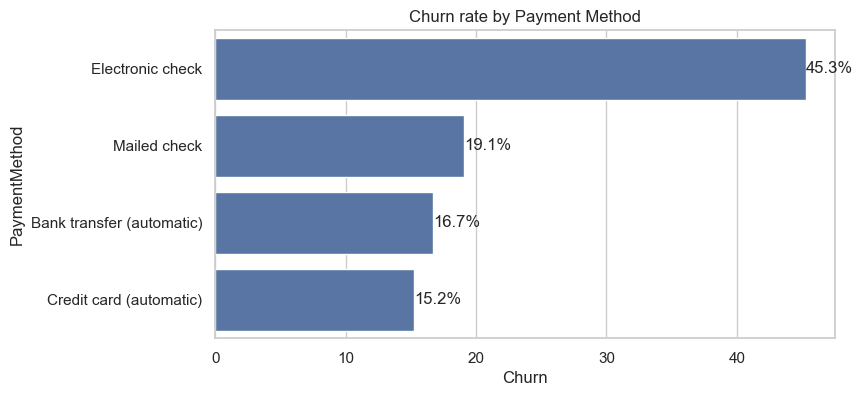

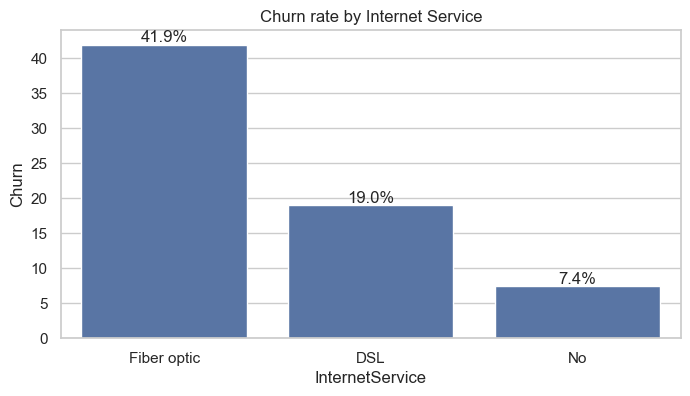

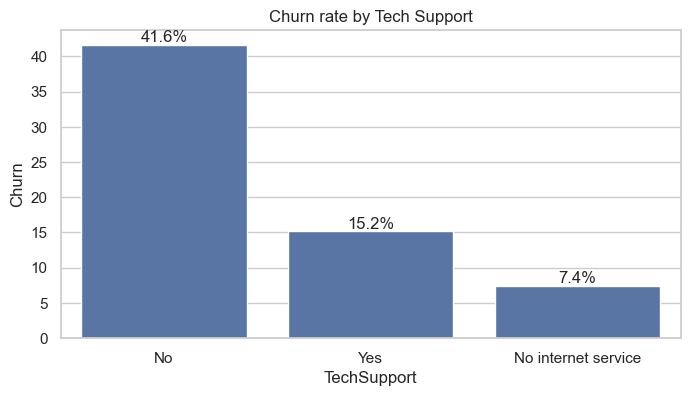

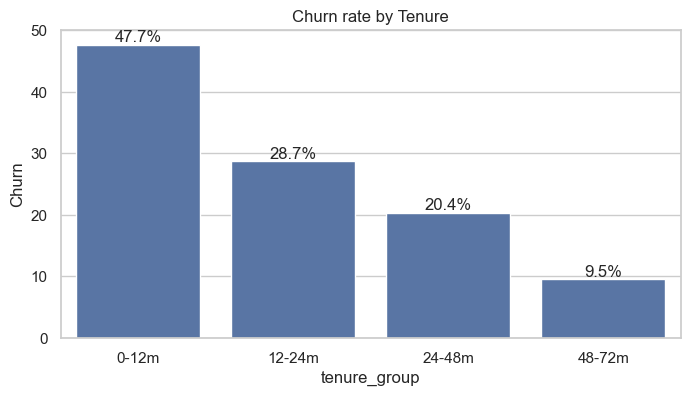

In [10]:
# analysis.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cấu hình hiển thị
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 4)

# 1. Load dataset
df = pd.read_csv("Telco-Customer-Churn-EDA.csv")


# ===============================
# Helper function để annotate bar
# ===============================
def add_percent_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')

# ===============================
# Churn theo Contract
# ===============================
contract_churn = df.groupby("Contract")["Churn"].mean().reset_index()
contract_churn["Churn"] *= 100

ax = sns.barplot(x="Contract", y="Churn", 
                 data=contract_churn.sort_values("Churn", ascending=False))
plt.title("Churn rate by Contract")
add_percent_labels(ax)
plt.savefig("churn_by_contract.png", dpi=300, bbox_inches="tight")
plt.show()


# ===============================
# Churn theo PaymentMethod
# ===============================
def add_percent_labels(ax, is_horizontal=False):
    for p in ax.patches:
        if is_horizontal:
            # Barplot ngang: dùng width
            ax.annotate(f'{p.get_width():.1f}%',
                        (p.get_width(), p.get_y() + p.get_height() / 2),
                        ha='left', va='center')
        else:
            # Barplot dọc: dùng height
            ax.annotate(f'{p.get_height():.1f}%',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom')

payment_churn = df.groupby("PaymentMethod")["Churn"].mean().reset_index()
payment_churn["Churn"] *= 100

ax = sns.barplot(y="PaymentMethod", x="Churn", 
                 data=payment_churn.sort_values("Churn", ascending=False))

plt.title("Churn rate by Payment Method")
add_percent_labels(ax, is_horizontal=True)
plt.savefig("churn_paymentmethod.png", dpi=300, bbox_inches="tight")
plt.show()


# ===============================
# Churn theo InternetService
# ===============================
internet_churn = df.groupby("InternetService")["Churn"].mean().reset_index()
internet_churn["Churn"] *= 100

ax = sns.barplot(x="InternetService", y="Churn", 
                 data=internet_churn.sort_values("Churn", ascending=False))
plt.title("Churn rate by Internet Service")
add_percent_labels(ax)
plt.savefig("churn_internetservice.png", dpi=300, bbox_inches="tight")
plt.show()

# ===============================
# Churn theo TechSupport
# ===============================
tech_churn = df.groupby("TechSupport")["Churn"].mean().reset_index()
tech_churn["Churn"] *= 100

ax = sns.barplot(x="TechSupport", y="Churn", 
                 data=tech_churn.sort_values("Churn", ascending=False))
plt.title("Churn rate by Tech Support")
add_percent_labels(ax)
plt.savefig("churn_techsupport.png", dpi=300, bbox_inches="tight")
plt.show()

# ===============================
# Churn theo Tenure bins
# ===============================
df["tenure_group"] = pd.cut(df["tenure"], 
                            bins=[0,12,24,48,72], 
                            labels=["0-12m","12-24m","24-48m","48-72m"])

tenure_churn = df.groupby("tenure_group", observed=True)["Churn"].mean().reset_index()

tenure_churn["Churn"] *= 100

ax = sns.barplot(x="tenure_group", y="Churn", 
                 data=tenure_churn)
plt.title("Churn rate by Tenure")
add_percent_labels(ax)
plt.savefig("churn_by_tenure.png", dpi=300, bbox_inches="tight")
plt.show()




📊 Insight từ phân tích EDA

Contract

Khách hàng dùng Month-to-month có churn rate 42.7% (cao nhất).

Ngược lại, hợp đồng dài hạn (2 năm) có churn rất thấp (2.8%).
👉 Hợp đồng ngắn hạn = rủi ro cao → cần chính sách giữ chân.

Payment Method

Electronic check có churn rate cao nhất (45.3%).

Các hình thức thanh toán tự động (Bank transfer, Credit card) có churn thấp (~15–17%).
👉 Khách hàng thanh toán thủ công dễ rời bỏ hơn.

Internet Service

Fiber optic có churn rate cao (41.9%) so với DSL (18.9%).
👉 Có thể do chất lượng dịch vụ hoặc giá cả Fiber optic khiến khách hàng không hài lòng.

Tech Support

Khách hàng không có hỗ trợ kỹ thuật có churn rate cao hơn đáng kể.
👉 Dịch vụ hỗ trợ kỹ thuật đóng vai trò quan trọng trong giữ chân khách hàng.

Tenure (thời gian gắn bó)

Khách hàng mới (0–12 tháng) churn rất cao.

Càng gắn bó lâu, churn rate càng giảm.
👉 Khách hàng mới là nhóm rủi ro → cần tập trung vào trải nghiệm ban đầu.